# Showcase Notebook for Usage Examples

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Project and Cluster Methods

In [2]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
import sys
sys.path.append(PROJECT_PATH)
import src.model_training.clusters as cl
import pandas as pd
from src.data_representation.Examples import load_Examples_from_file

### Load Examples

In [3]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
DATA_GEN_FOLDER_NAME = "Dec-21-2020"
DATASET_PATH = PROJECT_PATH + "data/" + DATA_GEN_FOLDER_NAME + "/"
OVERVIEW_DATASET_PATH = DATASET_PATH + "overview_filenames.csv"
overview_df = pd.read_csv(OVERVIEW_DATASET_PATH)

In [4]:
overview_df

,Unnamed: 0,Unnamed: 0.1,divide_by_country_population,do_smoothing,nr_days_for_avg,do_data_augmentation,percent_varianz,filename,kmedoids_3_filename,kmeans_3_filename,...,kmedoids_5_filename,kmeans_5_filename,dbscan_5_filename,ts_kmeans_5_filename,ts_kshape_5_filename,kmedoids_10_filename,kmeans_10_filename,dbscan_10_filename,ts_kmeans_10_filename,ts_kshape_10_filename
0,0,0,no,no,3,no,0.05,0,KMedoids_no_cluster_3_0,KMeans_no_cluster_3_0,...,KMedoids_no_cluster_5_0,KMeans_no_cluster_5_0,DBSCAN_no_cluster_5_0,TS_KMeans_no_cluster_5_0,TS_KShape_no_cluster_5_0,KMedoids_no_cluster_10_0,KMeans_no_cluster_10_0,DBSCAN_no_cluster_10_0,TS_KMeans_no_cluster_10_0,TS_KShape_no_cluster_10_0
1,1,1,no,no,3,no,0.01,1,KMedoids_no_cluster_3_1,KMeans_no_cluster_3_1,...,KMedoids_no_cluster_5_1,KMeans_no_cluster_5_1,DBSCAN_no_cluster_5_1,TS_KMeans_no_cluster_5_1,TS_KShape_no_cluster_5_1,KMedoids_no_cluster_10_1,KMeans_no_cluster_10_1,DBSCAN_no_cluster_10_1,TS_KMeans_no_cluster_10_1,TS_KShape_no_cluster_10_1
2,2,2,no,no,3,yes,0.05,2,KMedoids_no_cluster_3_2,KMeans_no_cluster_3_2,...,KMedoids_no_cluster_5_2,KMeans_no_cluster_5_2,DBSCAN_no_cluster_5_2,TS_KMeans_no_cluster_5_2,TS_KShape_no_cluster_5_2,KMedoids_no_cluster_10_2,KMeans_no_cluster_10_2,DBSCAN_no_cluster_10_2,TS_KMeans_no_cluster_10_2,TS_KShape_no_cluster_10_2
3,3,3,no,no,3,yes,0.01,3,KMedoids_no_cluster_3_3,KMeans_no_cluster_3_3,...,KMedoids_no_cluster_5_3,KMeans_no_cluster_5_3,DBSCAN_no_cluster_5_3,TS_KMeans_no_cluster_5_3,TS_KShape_no_cluster_5_3,KMedoids_no_cluster_10_3,KMeans_no_cluster_10_3,DBSCAN_no_cluster_10_3,TS_KMeans_no_cluster_10_3,TS_KShape_no_cluster_10_3
4,4,4,no,no,7,no,0.05,4,KMedoids_no_cluster_3_4,KMeans_no_cluster_3_4,...,KMedoids_no_cluster_5_4,KMeans_no_cluster_5_4,DBSCAN_no_cluster_5_4,TS_KMeans_no_cluster_5_4,TS_KShape_no_cluster_5_4,KMedoids_no_cluster_10_4,KMeans_no_cluster_10_4,DBSCAN_no_cluster_10_4,TS_KMeans_no_cluster_10_4,TS_KShape_no_cluster_10_4
5,5,5,no,no,7,no,0.01,5,KMedoids_no_cluster_3_5,KMeans_no_cluster_3_5,...,KMedoids_no_cluster_5_5,KMeans_no_cluster_5_5,DBSCAN_no_cluster_5_5,TS_KMeans_no_cluster_5_5,TS_KShape_no_cluster_5_5,KMedoids_no_cluster_10_5,KMeans_no_cluster_10_5,DBSCAN_no_cluster_10_5,TS_KMeans_no_cluster_10_5,TS_KShape_no_cluster_10_5
6,6,6,no,no,7,yes,0.05,6,KMedoids_no_cluster_3_6,KMeans_no_cluster_3_6,...,KMedoids_no_cluster_5_6,KMeans_no_cluster_5_6,DBSCAN_no_cluster_5_6,TS_KMeans_no_cluster_5_6,TS_KShape_no_cluster_5_6,KMedoids_no_cluster_10_6,KMeans_no_cluster_10_6,DBSCAN_no_cluster_10_6,TS_KMeans_no_cluster_10_6,TS_KShape_no_cluster_10_6
7,7,7,no,no,7,yes,0.01,7,KMedoids_no_cluster_3_7,KMeans_no_cluster_3_7,...,KMedoids_no_cluster_5_7,KMeans_no_cluster_5_7,DBSCAN_no_cluster_5_7,TS_KMeans_no_cluster_5_7,TS_KShape_no_cluster_5_7,KMedoids_no_cluster_10_7,KMeans_no_cluster_10_7,DBSCAN_no_cluster_10_7,TS_KMeans_no_cluster_10_7,TS_KShape_no_cluster_10_7
8,8,8,no,no,14,no,0.05,8,KMedoids_no_cluster_3_8,KMeans_no_cluster_3_8,...,KMedoids_no_cluster_5_8,KMeans_no_cluster_5_8,DBSCAN_no_cluster_5_8,TS_KMeans_no_cluster_5_8,TS_KShape_no_cluster_5_8,KMedoids_no_cluster_10_8,KMeans_no_cluster_10_8,DBSCAN_no_cluster_10_8,TS_KMeans_no_cluster_10_8,TS_KShape_no_cluster_10_8
9,9,9,no,no,14,no,0.01,9,KMedoids_no_cluster_3_9,KMeans_no_cluster_3_9,...,KMedoids_no_cluster_5_9,KMeans_no_cluster_5_9,DBSCAN_no_cluster_5_9,TS_KMeans_no_cluster_5_9,TS_KShape_no_cluster_5_9,KMedoids_no_cluster_10_9,KMeans_no_cluster_10_9,DBSCAN_no_cluster_10_9,TS_KMeans_no_cluster_10_9,TS_KShape_no_cluster_10_9


In [5]:
data = []
for f in overview_df['filename']:
    data.append((load_Examples_from_file(DATASET_PATH + str(f)), f))

In [16]:
from tqdm import tqdm
n_clusters = [3, 4, 5, 10]
models = [cl.KMedoids, cl.KMeans,  cl.DBSCAN, cl.TS_KMeans, cl.TS_KShape]
for n in n_clusters:
    filenames = []
    for m in tqdm(models):
        model_names = []
        for ex,file in data:
            ex.add_padding()
            model = m(n, metric='euclidean').fit(ex)
            filename = f"{model.name}_no_cluster_{n}_{file}"
            model.save_model(filename)
            model_names.append(filename)
        filenames.append(model_names)
    overview_df[f'kmedoids_{n}_filename'] = filenames[0]
    overview_df[f'kmeans_{n}_filename'] = filenames[1]
    overview_df[f'dbscan_{n}_filename'] = filenames[2]
    overview_df[f'ts_kmeans_{n}_filename'] = filenames[3]
    overview_df[f'ts_kshape_{n}_filename'] = filenames[4]

In [17]:
overview_df.to_csv(OVERVIEW_DATASET_PATH + "_filenames")

In [5]:
import copy
import pickle
var_df = copy.deepcopy(overview_df)
df = var_df.to_numpy()
for col in range(8,df.shape[1]):
    for row in range(var_df.shape[0]):
        filename = df[row][col]
#         print(filename)
        with open(DATASET_PATH + "model/" + filename, 'rb') as f:
            model = pickle.load(f)
            var, n_max, n_min = model.statistics()
            df[row][col] = var

In [6]:
df_ = pd.DataFrame(df, columns=var_df.columns)
df_.min()

Unnamed: 0                            0
Unnamed: 0.1                          0
divide_by_country_population         no
do_smoothing                         no
nr_days_for_avg                       3
do_data_augmentation                 no
percent_varianz                    0.01
filename                              0
kmedoids_3_filename             464.222
kmeans_3_filename               2086.22
dbscan_3_filename               8769.56
ts_kmeans_3_filename            2086.22
ts_kshape_3_filename            169.556
kmedoids_4_filename                 341
kmeans_4_filename                2407.5
dbscan_4_filename                  7041
ts_kmeans_4_filename             2231.5
ts_kshape_4_filename              321.5
kmedoids_5_filename              301.84
kmeans_5_filename               2229.84
dbscan_5_filename               6082.24
ts_kmeans_5_filename            2179.84
ts_kshape_5_filename             199.44
kmedoids_10_filename             206.56
kmeans_10_filename              1378.36


In [13]:
ts_k = df_[df_["ts_kshape_10_filename"] <= 171]
print(ts_k)
# print(overview_df.iloc[4])
with open(DATASET_PATH + "model/TS_KShape_no_cluster_4_46", 'rb') as f: # no cluster: 10
            ts_kshape_10 = pickle.load(f)

   Unnamed: 0 Unnamed: 0.1 divide_by_country_population do_smoothing  \
46         46           46                          yes          yes   

   nr_days_for_avg do_data_augmentation percent_varianz filename  \
46              14                  yes            0.05       46   

   kmedoids_3_filename kmeans_3_filename  ... kmedoids_5_filename  \
46             542.889           2101.56  ...              403.84   

   kmeans_5_filename dbscan_5_filename ts_kmeans_5_filename  \
46           2229.84           7191.04              3185.44   

   ts_kshape_5_filename kmedoids_10_filename kmeans_10_filename  \
46              1571.44               256.76            1394.16   

   dbscan_10_filename ts_kmeans_10_filename ts_kshape_10_filename  
46            4044.96               1362.76                170.56  

[1 rows x 28 columns]


In [14]:
ts_kshape_10.plot_geo_cluster().show()

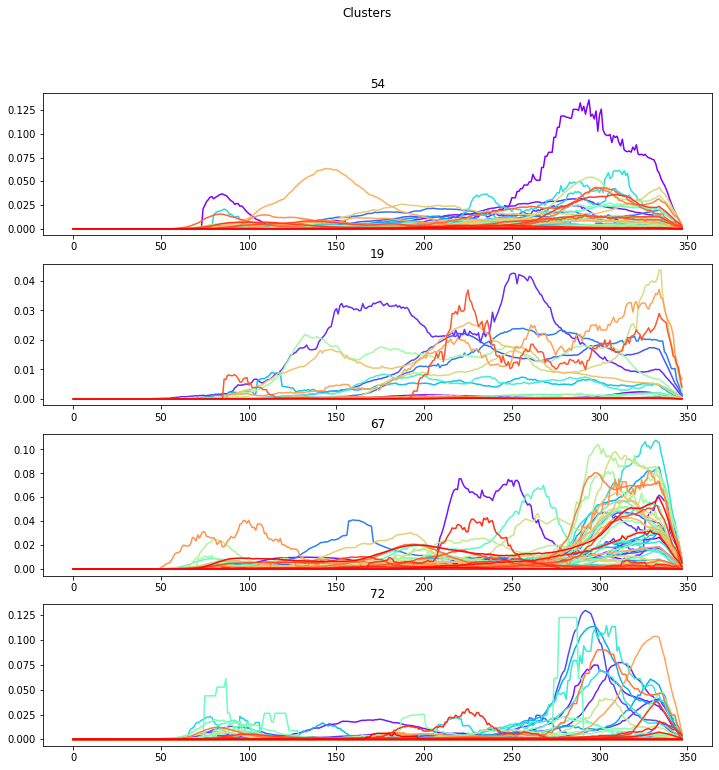

In [15]:
ts_kshape_10.plot_cluster().show()

### Demonstration of Augmentation/Smoothing

In [67]:
germany = []
for d in data:
    germany.append(list(filter(lambda snippet: snippet.country_id=="DEU", d[0].train_data))[0])

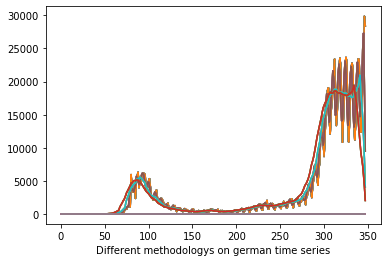

In [69]:
import matplotlib.pyplot as plt
plt.figure()
for g in germany:
    plt.plot(g.time_series)
plt.xlabel('Different methodologys on german time series')
plt.show()